Disease diagnosis (e.g., predicting diabetes)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df=pd.read_csv(url, header=None, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
X=df.drop('Outcome', axis=1)
y=df.Outcome
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [56]:
# Normalize the data for better performance
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
# Initialize and train the logistic regression model
model=LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [58]:
print(f"Model Intercept: {model.intercept_}")
print(f"Model Coefficient: {model.coef_}")

Model Intercept: [-0.88612015]
Model Coefficient: [[ 0.21255394  1.07130143 -0.24782647  0.0457288  -0.20078252  0.77818216
   0.23062467  0.42120732]]


In [59]:
#Model Prediction
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)[:,1]  # Probabilities for the positive class

accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
report=classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")
print(f"Model Report: {report}")

Model Accuracy: 0.7532467532467533
Confusion Matrix: [[79 20]
 [18 37]]
Model Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



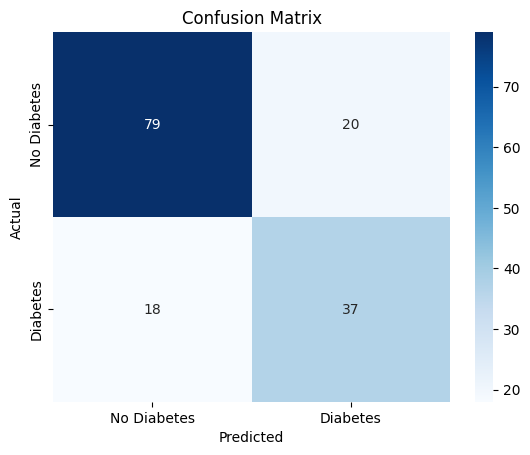

In [61]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()